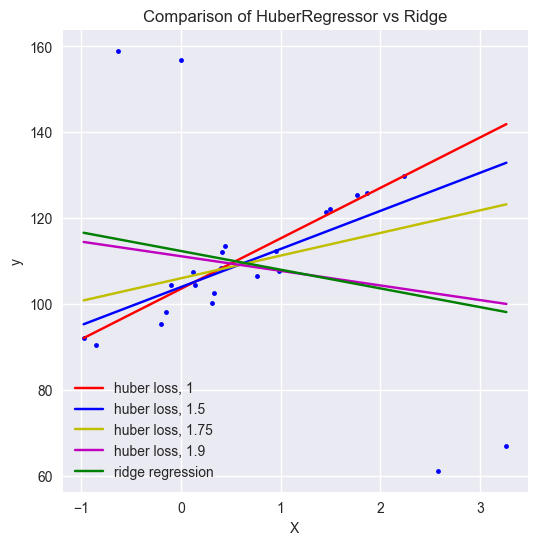

In [5]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入回归器
from sklearn.linear_model import HuberRegressor, Ridge
# 导入数据生成工具
from sklearn.datasets import make_regression
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 生成数据
np.random.seed(0)
X, y = make_regression(
    n_samples=20, n_features=1, 
    random_state=0, 
    noise=4.0, 
    bias=100.0
)
# 添加噪声
X_outliers = np.random.normal(0, 0.5, size=(4, 1))
y_outliers = np.random.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0
y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
# 开始绘图
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X, y, "b.")
# 颜色和线型
colors = ["r-", "b-", "y-", "m-"]
# 预测的x
x = np.linspace(X.min(), X.max(), 7)
# epsilon的值
epsilon_values = [1, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    # 构建Huber回归模型
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    # 模型拟合
    huber.fit(X, y)
    # 预测
    y_pred = huber.coef_ * x + huber.intercept_
    ax.plot(x, y_pred, colors[k], label="huber loss, %s" % epsilon)

# 岭回归模型，没有惩罚，就是OLS
ridge = Ridge(alpha=0.0, random_state=0)
# 模型拟合
ridge.fit(X, y)
# 预测值
y_pred = ridge.coef_ * x + ridge.intercept_
ax.plot(x, y_pred, "g-", label="ridge regression")
ax.set_title("Comparison of HuberRegressor vs Ridge")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend(loc=0)
plt.show()
fig.savefig("../codeimage/code30.pdf")
